39.59235668789809% zero - 7770, is larger than zero - 19625


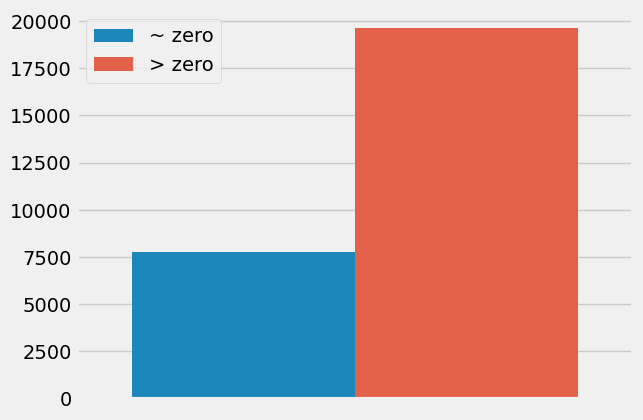

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
data = pd.read_excel("dataset/rollingsales/rollingsales_manhattan.xls", skiprows=4)
data.columns = [column.lower().replace("\n", " ").replace("-", " ").replace(" ", "_") for column in
                data.columns]

filter_data = data[(data.sale_price != None) & (data.sale_date != None)]

data_by_sale_price_zero = filter_data[filter_data.sale_price <= 10].borough.count()
data_by_sale_price_larger_than_zero = filter_data[filter_data.sale_price > 10].borough.count()
print("{}% zero - {}, is larger than zero - {}".format(
    data_by_sale_price_zero / data_by_sale_price_larger_than_zero * 100, data_by_sale_price_zero,
    data_by_sale_price_larger_than_zero))
ax=sns.barplot(
                 x=[0, 0],
                 y=[data_by_sale_price_zero, data_by_sale_price_larger_than_zero],
                 hue=["~ zero", "> zero"])
ax.get_xaxis().set_visible(False)
data_building_class = filter_data.groupby(["building_class_at_present"]).count()

In [9]:
import re
import os

DIR_PATH = "dataset/rollingsales/"
datas = []
CLEAN =["apart_ment_number","zip_code","block","lot","ease_ment","address","residential_units","commercial_units", "total_units",]
def find_path(value: str):
    return re.search("(?<=_)(.*?)(?=\.)", value).group(0)


def build_type_category(category: str):
    type_buffer = ""
    building_types = ["homes", "condos", "apartments", "buildings", "residential", "factories", "garages",
                           "warehouses", "land", "facilities"]
    for type in building_types:
        if type.upper() in category:
            type_buffer = type
            break
    return type_buffer.capitalize() if type_buffer != "" else "Other"


for path in os.listdir(DIR_PATH):
    borough_name = find_path(path)
    data = pd.read_excel(str(DIR_PATH + path), skiprows=4)
    data.columns = [column.lower().replace("\n", " ").replace("-", " ").replace(" ", "_") for column in
                    data.columns]
    data.borough = borough_name
    purified_data = data.drop(CLEAN,axis=1)
    filtered_data = purified_data[(purified_data.sale_price != None) & (purified_data.sale_date != None)]
    datas.append(filtered_data)

datas = pd.concat(datas)
datas.insert(3, "type_building", [build_type_category(category) for category in datas.building_class_category.to_list()])
datas.insert(len(datas.columns)-1, "quarter_group", [str(value.quarter) + "-quarter" for value in datas.sale_date.to_list()])
datas

,borough,neighborhood,building_class_category,type_building,tax_class_at_present,building_class_at_present,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,quarter_group,sale_date
0,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A5,1842,2048,1901,1,A5,355000,3-quarter,2013-07-08
1,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,1103,1290,1910,1,A1,474819,2-quarter,2013-05-20
2,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,1986,1344,1899,1,A1,210000,1-quarter,2013-03-12
3,bronx,BATHGATE,01 ONE FAMILY HOMES,Homes,1,A1,2329,1431,1901,1,A1,343116,3-quarter,2013-07-01
4,bronx,BATHGATE,02 TWO FAMILY HOMES,Homes,1,S2,1855,4452,1931,1,S2,0,3-quarter,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B9,2590,2450,1998,1,B9,505000,2-quarter,2013-05-15
6352,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B9,2255,2377,1998,1,B9,0,2-quarter,2013-04-09
6353,statenisland,WOODROW,02 TWO FAMILY HOMES,Homes,1,B2,4000,2962,2000,1,B2,0,3-quarter,2012-08-01
6354,statenisland,WOODROW,22 STORE BUILDINGS,Buildings,4,K6,21663,6950,2008,4,K6,1300000,2-quarter,2013-05-29


,borough,neighborhood
0,bronx,515
1,brooklyn,3099
2,manhattan,6441
3,queens,1379
4,statenisland,348


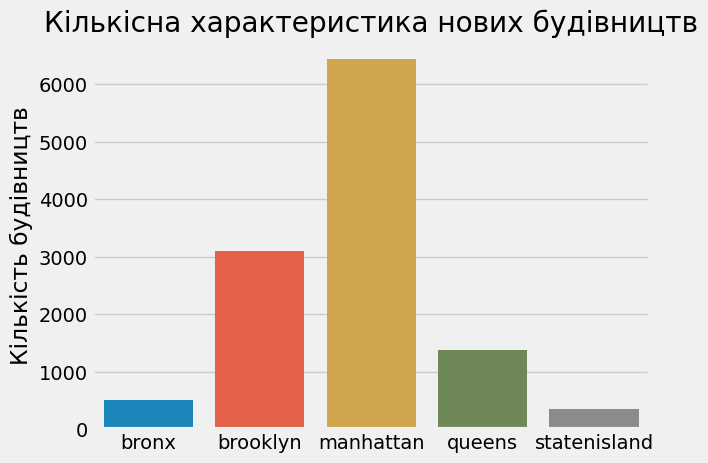

In [10]:
group_by_new_building = datas[datas.year_built == 0].groupby(["borough"], as_index=False, group_keys=True).count()
ax = sns.barplot(data=group_by_new_building,
                     x=group_by_new_building.borough,
                     y=group_by_new_building.type_building)
ax.set(title="Кількісна характеристика нових будівництв", ylabel="Кількість будівництв", xlabel="")
group_by_new_building.loc[:,["borough","neighborhood"]]

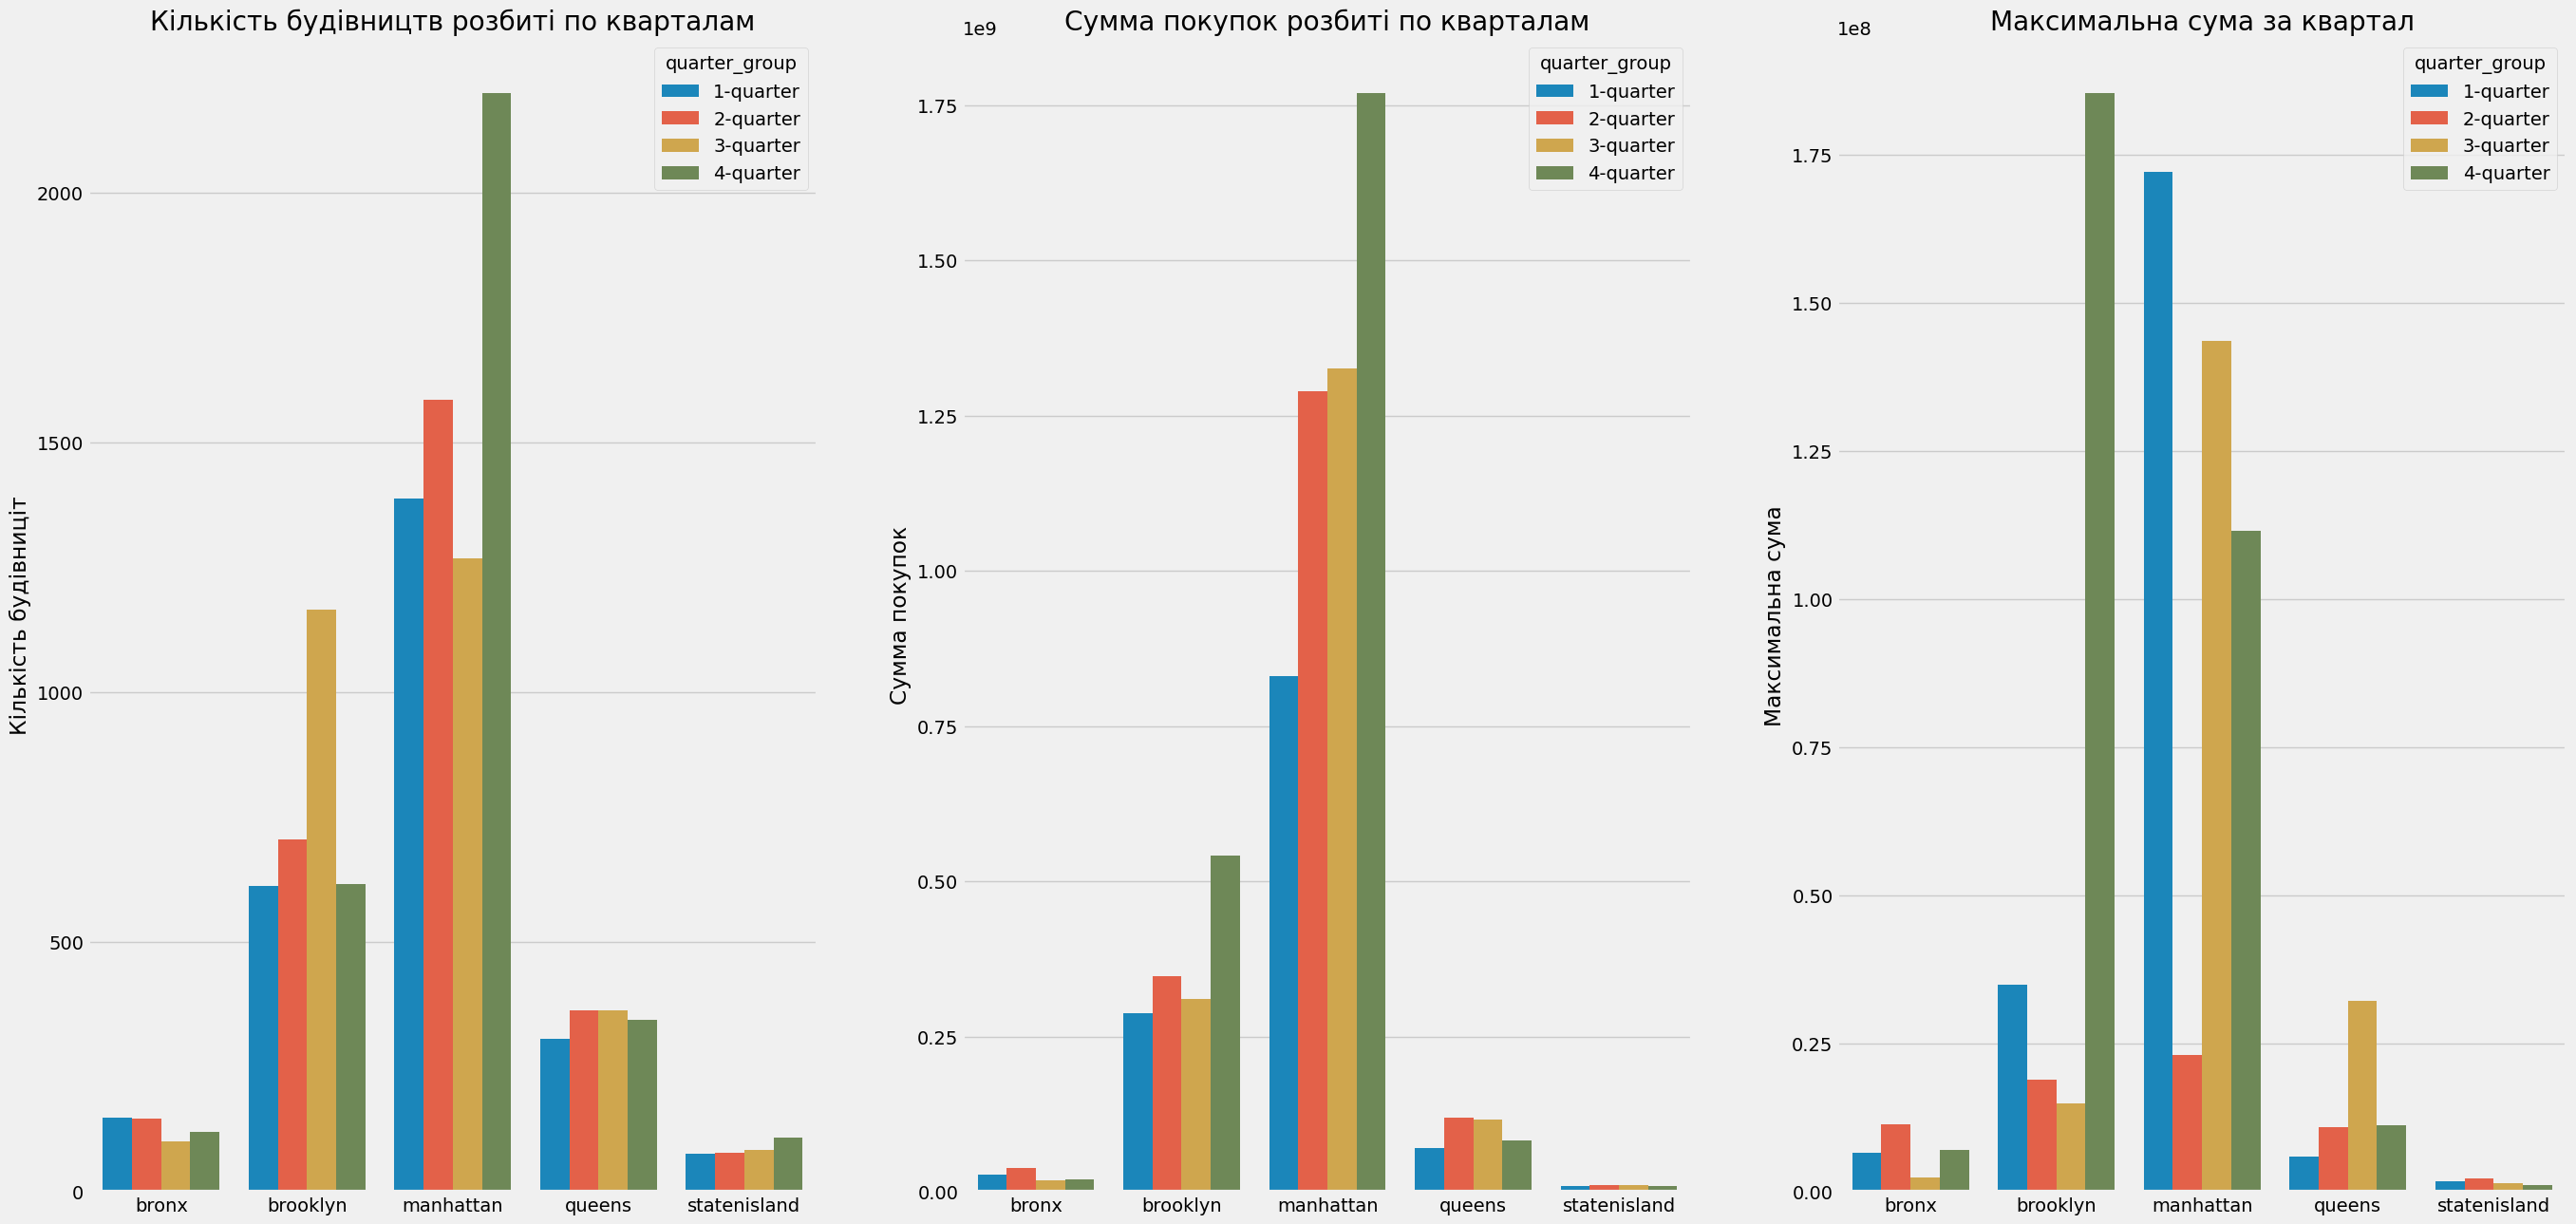

In [44]:
group_by_sale_quarter = datas[datas.year_built == 0].groupby(["borough", "quarter_group"], as_index=False)
fig, axes=plt.subplots(1,3,figsize=(30,15))
groups_titles=["Кількість будівництв розбиті по кварталам", "Сумма покупок розбиті по кварталам", "Максимальна сума за квартал"]
y_labels=["Кількість будівниціт", "Сумма покупок", "Максимальна сума"]
groups = [group_by_sale_quarter.count(), group_by_sale_quarter.sum(),group_by_sale_quarter.sale_price.max()]
for index,group in enumerate(groups):
    sns.barplot(ax=axes[index],
                data=group,
                x=group.borough,
                y=group.sale_price,
                hue=group.quarter_group)
    axes[index].set(xlabel="", title=groups_titles[index], ylabel=y_labels[index])

,borough,type_building,sale_price
0,bronx,Apartments,1
1,brooklyn,Buildings,1
2,brooklyn,Garages,1
3,brooklyn,Land,1
4,manhattan,Apartments,4
5,manhattan,Buildings,31
6,manhattan,Condos,4
7,manhattan,Facilities,2
8,manhattan,Land,2
9,manhattan,Other,13


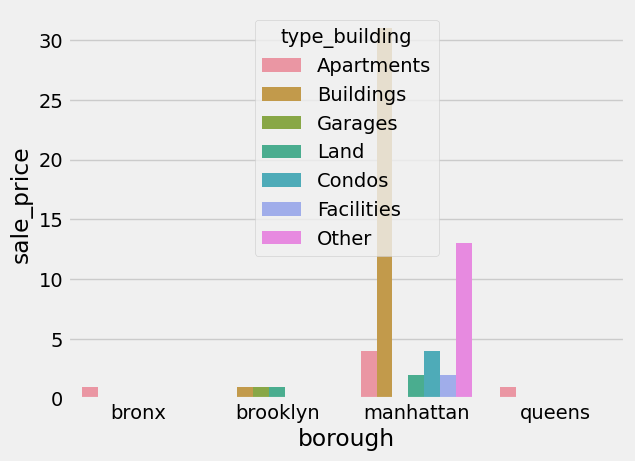

In [40]:

group_by_max_sale_quarter = datas[datas.sale_price > 10**8].loc[:,['borough','type_building','sale_price']].groupby(['borough','type_building'],as_index=False)
group_by_max_sale_quarter_sum =group_by_max_sale_quarter.sum()
group_by_max_sale_quarter_count =group_by_max_sale_quarter.count()
ax=sns.barplot(data=group_by_max_sale_quarter_count,
                x=group_by_max_sale_quarter_count.borough,
                y=group_by_max_sale_quarter_count.sale_price,
                hue=group_by_max_sale_quarter_count.type_building, zorder=2)
group_by_max_sale_quarter_count

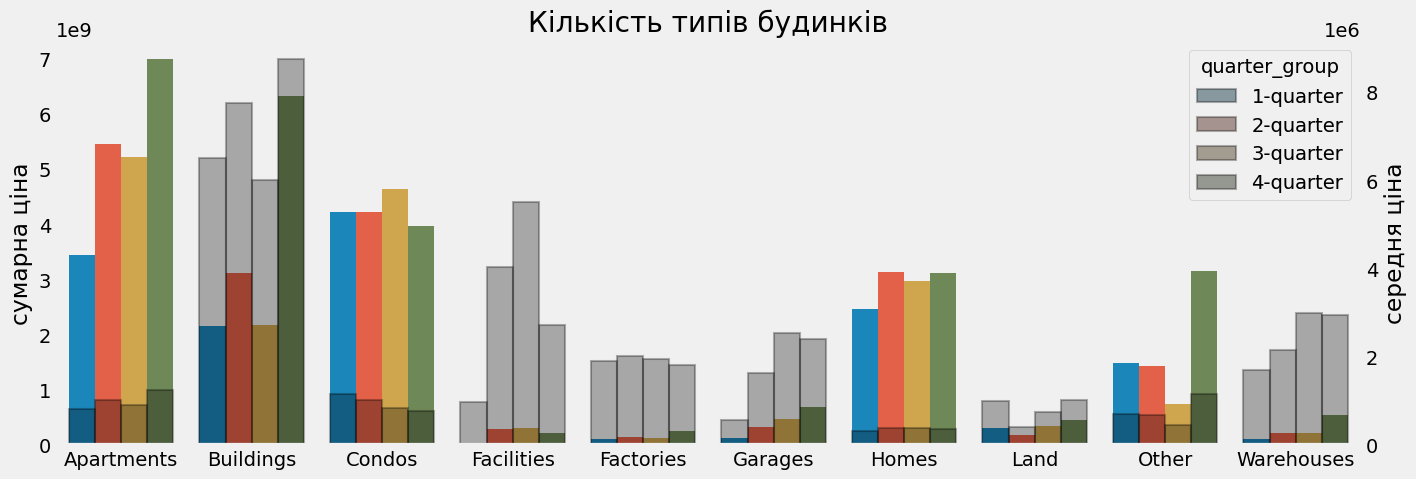

In [43]:
group_by_type_building = datas.groupby(["quarter_group","type_building"], as_index=False)
fig, ax=plt.subplots(figsize=(15,5))
group_by_type_building_mean = group_by_type_building.mean()
group_by_type_building_sum = group_by_type_building.sum()
ax=sns.barplot(data=group_by_type_building_sum,
                x=group_by_type_building_sum.type_building,
                y=group_by_type_building_sum.sale_price,
                hue=group_by_type_building_sum.quarter_group,
                zorder=2)
ax2 = ax.twinx()
ax2=sns.barplot(data=group_by_type_building_mean,
                x=group_by_type_building_mean.type_building,
                y=group_by_type_building_mean.sale_price,
                hue=group_by_type_building_mean.quarter_group,
                zorder=2,
                palette=['black','black','black','black'],
                alpha=0.3,
                edgecolor="black",
                linewidth=1.5)
ax.set(title="Кількість типів будинків", xlabel=None, ylabel="сумарна ціна")
ax2.set(xlabel=None, ylabel="середня ціна")
ax.grid(False)
ax2.grid(False)

,borough,building_class_at_present,neighborhood
25,bronx,D4,672
10,bronx,B1,640
105,brooklyn,A1,791
194,brooklyn,R4,2703
191,brooklyn,R1,625
130,brooklyn,D4,2125
122,brooklyn,C6,665
119,brooklyn,C3,614
116,brooklyn,C0,2258
114,brooklyn,B3,1229


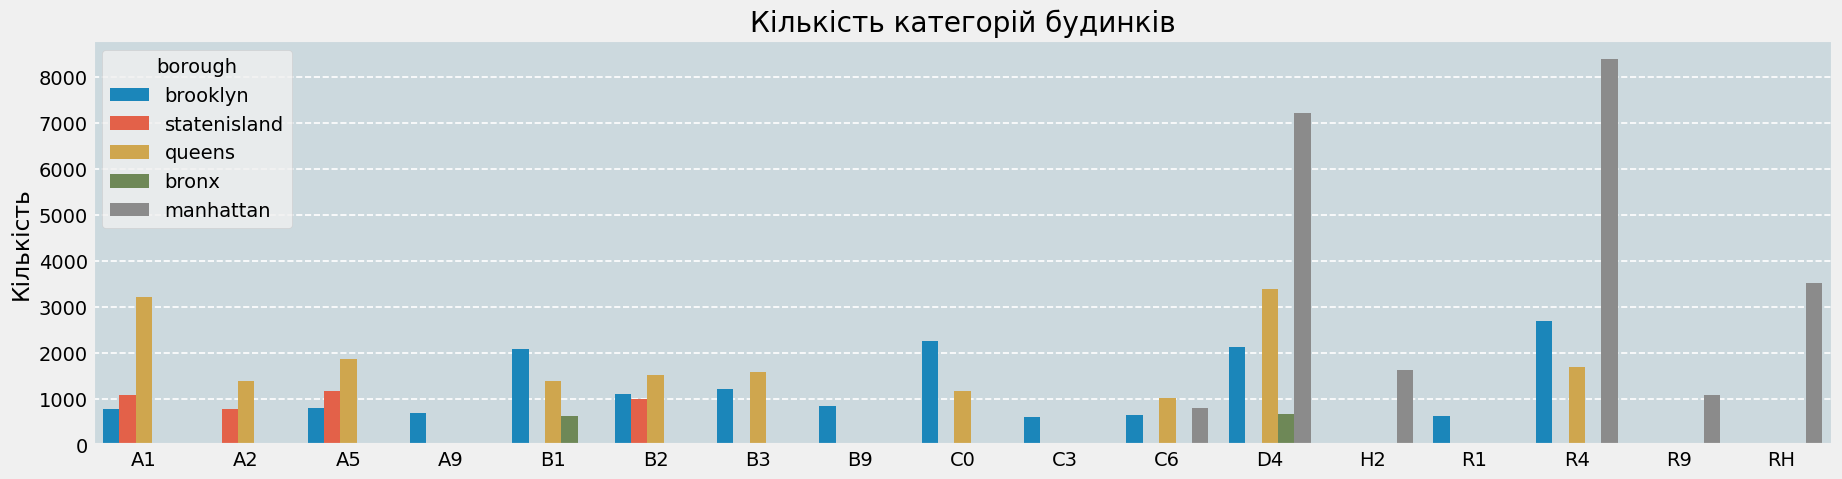

In [70]:
group_by_type_building = datas.groupby(["borough","building_class_at_present"], as_index=False).count()
group_by_type_building = group_by_type_building[group_by_type_building.sale_price >600].sort_values("building_class_at_present")
fig, ax=plt.subplots(figsize=(20,5))
sns.barplot(data=group_by_type_building,
                x=group_by_type_building.building_class_at_present,
                y=group_by_type_building.sale_price,
                hue=group_by_type_building.borough,
                zorder=2)
ax.grid('on', which='both', axis='y', 
        color="white",linestyle="dashed",linewidth=1.2,zorder=1)
ax.set(title="Кількість категорій будинків", xlabel="", ylabel="Кількість")
ax.set_facecolor("#ccd9de")
group_by_type_building[group_by_type_building.borough=="statenisland"].loc[:,["borough","building_class_at_present","neighborhood"]]
group_by_type_building[group_by_type_building.borough=="brooklyn"].loc[:,["borough","building_class_at_present","neighborhood"]].sort_values(["neighborhood"])
group_by_type_building.loc[:,["borough","building_class_at_present","neighborhood"]].sort_values(["borough"])

,borough,tax_class_at_present,neighborhood
0,bronx,1,2828
1,bronx,2,1429
2,bronx,4,506
10,brooklyn,1,10976
11,brooklyn,2,6070
13,brooklyn,4,2445
15,brooklyn,1A,306
16,brooklyn,1B,422
18,brooklyn,2A,1512
19,brooklyn,2B,417


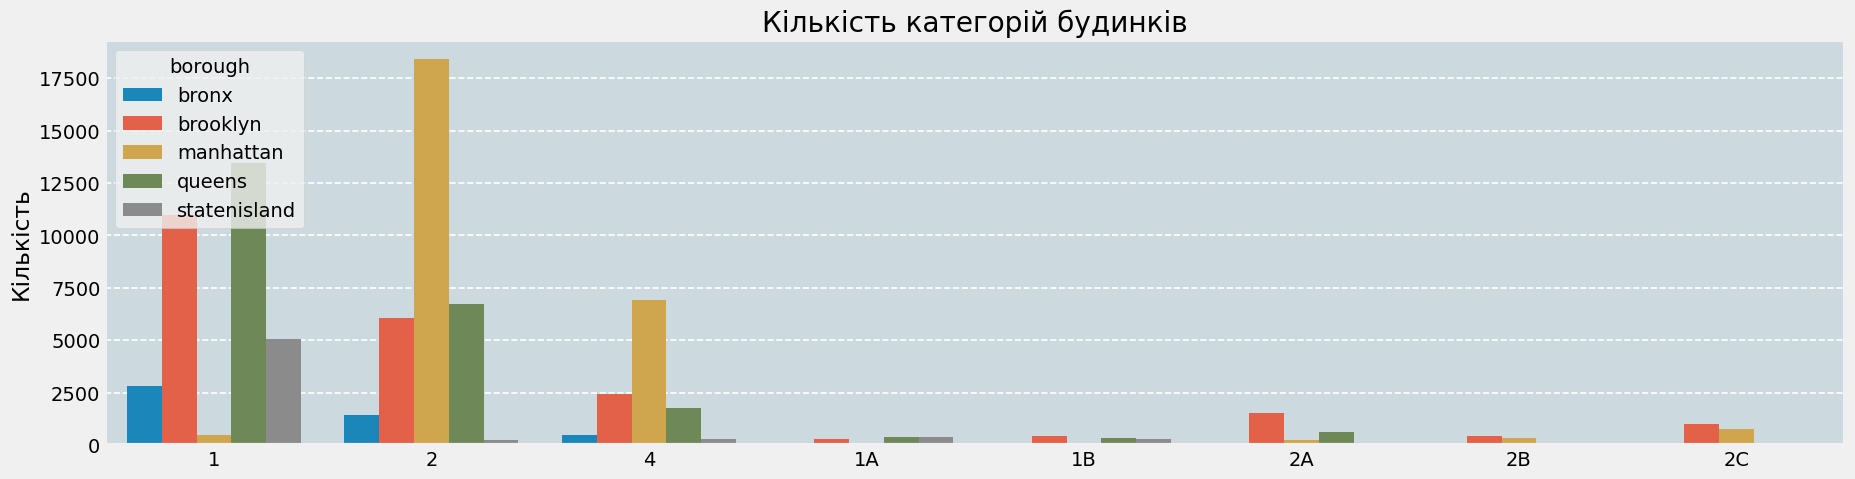

In [71]:
group_by_tax_class = datas.groupby(["borough","tax_class_at_present"], as_index=False).count()
group_by_tax_class = group_by_tax_class[group_by_tax_class.neighborhood > 250]
fig, ax=plt.subplots(figsize=(20,5))
sns.barplot(data=group_by_tax_class,
                x=group_by_tax_class.tax_class_at_present,
                y=group_by_tax_class.sale_price,
                hue=group_by_tax_class.borough,
                zorder=2)
ax.grid('on', which='both', axis='y', 
        color="white",linestyle="dashed",linewidth=1.2,zorder=1)
ax.set(title="Кількість категорій будинків", xlabel="", ylabel="Кількість")
ax.set_facecolor("#ccd9de")
group_by_tax_class.loc[:,["borough","tax_class_at_present","neighborhood"]].sort_values(["borough"])